In [1]:
import numpy as np
import glob
import os
import netCDF4
import matplotlib.pyplot as plt
from scipy import signal
from scipy import interpolate
from scipy import ndimage
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib import rcParams
%matplotlib inline

In [17]:
datadir = "/home/ctroupin/DataOceano/CMEMS/INSITU_BAL_NRT_OBSERVATIONS_013_032/monthly/mooring/201604/"

In [63]:
def createmap():
    m = Basemap(projection='merc',llcrnrlat=55.,urcrnrlat=57.,\
           llcrnrlon=9.0,urcrnrlon=14,lat_ts=56,resolution='h')
    return m

In [64]:
def draw_screen_poly(lats, lons, m):
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( xy, facecolor='blue', alpha=0.4 )
    plt.gca().add_patch(poly)

In [65]:
m = createmap()

In [20]:
def get_stations(filedir):
    """
    Generate list of coordinates and of stations names, 
    given the name of a directory containing the files
    """
    datafilelist = sorted(glob.glob(os.path.join(datadir, '*.nc')))

    lon_station, lat_station, name_station = [], [], []
    for datafiles in datafilelist:
        with netCDF4.Dataset(datafiles) as nc:
            lon_station.append(nc.variables['LONGITUDE'][:].mean())
            lat_station.append(nc.variables['LATITUDE'][:].mean())
            name_station.append(nc.site_code)
    return lon_station, lat_station, name_station

In [66]:
lon_station, lat_station, name_station = get_stations(datadir)

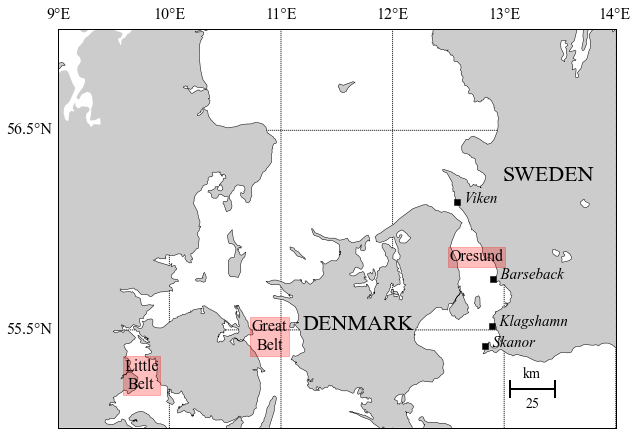

In [68]:
fig = plt.figure(figsize=(10, 10))
m.drawcoastlines(zorder=3, linewidth=0.5)
m.fillcontinents(zorder=2)
m.drawcountries(zorder=4)
m.drawmapscale(13.25, 55.2, 13.25, 55.2, 25, barstyle='simple', units='km', fontsize=14,)
m.drawmeridians(np.arange(9., 14.51, 1.), labels=[0, 0, 1, 0], 
                fontsize=16, color='k', dashes=[1, 1], linewidth=1.0, zorder=1)
m.drawparallels(np.arange(53.5, 57.51, 1.), labels=[1, 0, 0, 0], 
                fontsize=16, color='k', dashes=[1, 1], linewidth=1.0, zorder=1)
# draw_screen_poly([55.6, 56.1, 56.1, 55.55], [12.5, 12.5, 13.2, 13.2], m)

# Add the stations on the map
for lon_s, lat_s, name_s in zip(lon_station, lat_station, name_station):
    lon_s, lat_s = m(lon_s, lat_s)
    plt.plot(lon_s, lat_s, 'ks')
    plt.text(lon_s, lat_s, '  ' + name_s, ha='left', fontsize=15, style='italic')
    
    
    
lont, latt = m(13, 56.25)
plt.text(lont, latt, 'SWEDEN', fontsize=22)
lont, latt = m(11.2, 55.5)
plt.text(lont, latt, 'DENMARK', fontsize=22)
lont, latt = m(9.75, 55.2)
tt = plt.text(lont, latt, 'Little\nBelt', ha='center', fontsize=16)
tt.set_bbox(dict(color='r', alpha=0.25, edgecolor='red'))
lont, latt = m(10.9, 55.4)
tt = plt.text(lont, latt, 'Great\nBelt', ha='center', fontsize=16)
tt.set_bbox(dict(color='red', alpha=0.25, edgecolor='red'))
lont, latt = m(12.75, 55.85)
tt = plt.text(lont, latt, 'Oresund', ha='center', fontsize=16)
tt.set_bbox(dict(color='red', alpha=0.25, edgecolor='red'))
plt.savefig("/home/ctroupin/Projects2/201501_InsTAC/201604_UseCase/oresund_map")